## Logistische Gleichung

### Herleitung$^1$:

Die logistische Gleichung, aufgestellt von Pierre Francois Verhulst (1804-1849), stellt die Entwicklung einer Population modellhaft dar. Aus der Größe $X(n)$ der Population zu einem gewissen Zeitpunkt, soll auf die Größe $X(n+1)$ nach einer Fortpflanzungsperiode geschlossen werden. Dabei werden die Faktoren Vermehrung und Verhungern berücksichtigt.

Die neue Population wächst pro Zeitperiode um den Wachstumsfaktor $w$. Daraus ergibt sich folgende Formel für die Größe der Population nach $n+1$ Perioden:

$$ X(n+1) = X(n) \cdot w = X(0) \cdot w^{n+1} $$

wobei $X(0)$ der Startwert der Population ist, $w$ ist der Wachstumsfaktor und $n$ ist die Anzahl Fortpflanzungsperioden.

So würde eine Population unendlich wachsen. Da es aber auch beschränkende Faktoren gibt (wie z.B. Nahrungsangebot) muss es auch einen limitierenden Bremsfaktor geben. Die Überlegung ist, dass sich die Sterberate erhöht, je näher sich die Population eine theoretische Maximalgröße annähert. Mit zunehmender Sterberate beginnt nun auch die Wachstumsrate wieder zu sinken. Also muss der Wachstumsfaktor $w$ proportional zur Differenz zwischen der Maximalgröße $M$ und der aktuellen Populationsgröße $X$ sein:

$$ w = q \cdot (M-X)$$

mit $q$ als Proportionalitätskonstante.

Hängt also $w$ von der aktuellen Populationsgröße ab, so erhalten wir die logistische Gleichung $L$. Wir berechnen dabei die aktuelle Größe $X(n+1)$ aus der Populationsgröße in der Vorperiode $X_n$:

$$ X(n+1) = q\cdot(M-X(n))\cdot X(n)$$

Die nachfolgende Funktion berechnet die aktuelle Populationsgröße $X(n)$ aus eine Anfangsgröße $X0$.

In [1]:
def L(X0, M, q, n):
    """ 
    :param X0: int, Sartwert
    :param M: int, Maximalgröße der Population
    :param q: float, Proportionalitätskonstante
    :param n: Anzahl Fortpflanzungsperioden
    :return: aktuelle Populationsgröße
    """
    tmp = X0
    for i in range(n):
         tmp = q*(M - tmp)*tmp
    return tmp

Die Logistische Gleichung kann nun noch umgeformt werden. Und zwar wird die Populationsgröße $X$ als Bruchteil der Maximalgröße $M$ angegeben und die Proportionalitätskonstante mit $M$ multipliziert. 

\begin{eqnarray}
    & X(n+1) &=& q\cdot(M-X(n))\cdot X(n)               &|&  X \rightarrow x \cdot M \\
    \Leftrightarrow & x(n+1)M &=& q(M-x(n)M)x(n)M \quad &|& :M \\
    \Leftrightarrow & x(n+1) &=& qM(1-x(n))x(n)         &|& qM \rightarrow r \\
    \Leftrightarrow & x(n+1) &=& r(1-x(n))x(n)
\end{eqnarray}

Die Implementierung  der umgeformten logistischen Gleichung lautet:

In [2]:
from itertools import repeat

def L(x0, r, n):
    """ 
    :param x0: int (x0 kann auch ein numpy-Array sein), Startwert
    :param r: float, Proportionalitätskonstante
    :param n: Anzahl Fortpflanzungsperioden
    :return: Populationsgröße als Bruchteil der Maximalgröße
    """
    tmp = x0
    for _ in repeat(None, n):
        tmp = r*(1 - tmp)*tmp
    return tmp

### Verhalten in Abhängigkeit von r$^4$$^{,5}$:

Bei verschiedenen $r$ können die folgenden Verhaltensweisen für große $n$ beobachtet werden. Dabei hängt dieses Verhalten nicht vom Anfangswert $x_0$ ab, sondern nur von $r$.

Zuerst wollen wir die Fixpunkte der logistischen Gleichung berechnen:
\begin{eqnarray}
    & f(x^*) &=& x^* \quad ^2\\               
    \Leftrightarrow & rx^*(1-x^*) &=& x^* \\
    \Leftrightarrow & -r(x^*)^2 + rx^* - x^* &=& 0 \\
    \Leftrightarrow & x^*(-rx^* + r - 1) &=& 0 \quad \rightarrow {x_1}^*=0 \\
    \Leftrightarrow & rx^* &=& r-1 \rightarrow {x_2}^*=\frac{r-1}{r}
\end{eqnarray}



Die nachfolgende Funktion plottet die logistische Gleichung (x-Achse: Generation; y-Achse: Populationswert), sowie deren Grenzwertverhalten:

In [26]:
def plotL(x0, r, n, g):
    """ 
    :param x0: int (x0 kann auch ein numpy-Array sein), Startwert
    :param r: float, Proportionalitätskonstante
    :param n: Anzahl Fortpflanzungsperioden
    :param g: Auswahl an verschiedenen Grenzwerten 0-3 für bestimmte Bereiche von r
    :return: plottet L
    """
    toBePlotted = []
    points = []
    tmp = n
    
    if g == 0:
        toBePlotted.append(plot((g), xmax=100, xmin=0, thickness=1.0, color='blue', legend_label='Grenzwert'))
    if g == 1:
        toBePlotted.append(plot(((r-1)/r), xmax=100, xmin=0, thickness=0.7, legend_label='Grenzwert'))
    if g == 2:
        toBePlotted.append(plot((L(x0, r, tmp)), xmax=100, xmin=0, thickness=0.7, color='yellow', legend_label='Haeufungspunkt1'))
        toBePlotted.append(plot((L(x0, r, (tmp-1))), xmax=100, xmin=0, thickness=0.7, legend_label='Haeufungspunkt2'))
    if g == 3:
        toBePlotted.append(plot((L(x0, r, tmp)), xmax=100, xmin=0, thickness=0.7, color='yellow', legend_label='Haeufungspunkt1'))
        toBePlotted.append(plot((L(x0, r, (tmp-1))), xmax=100, xmin=0, thickness=0.7, color='green', legend_label='Haeufungspunkt2'))
        toBePlotted.append(plot((L(x0, r, (tmp-2))), xmax=100, xmin=0, thickness=0.7, color='brown', legend_label='Haeufungspunkt3'))
        toBePlotted.append(plot((L(x0, r, (tmp-3))), xmax=100, xmin=0, thickness=0.7, legend_label='Haeufungspunkt4'))
    
    for k in range(tmp):
        points.append((n, L(x0, r, n)))
        n = n - 1
    toBePlotted.append(list_plot(points, color='red', pointsize=5, figsize=8, axes_labels=["Generation","Population"], fontsize=6,))
    for i in range(len(points) - 1):
        toBePlotted.append(line([points[i],points[i+1]],thickness=0.5,color='black'))
    return sum(toBePlotted)

$0 <= r <= 1$:

In [27]:
import ipywidgets as widgets
from ipywidgets import interact,fixed

n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False)
x0_widget = widgets.FloatSlider(value=0.7, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
r_widget = widgets.FloatSlider(value=0.94, min=0.01, max=0.99, step=0.01, continuous_update=False, description='r:')
i0 = interact(plotL, x0=x0_widget, r=r_widget, n=n_widget, g=fixed(0))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNywgY29udGludW91c191cGRhdGU9RmFsc2UsIGRlc2NyaXB0aW9uPXUneDA6JywgbWF4PTAuOTksIG1pbj0wLjAxLCDigKY=


Fazit: Für r-Werte zwischen 0 und 1 stirbt die Population immer aus.

$1 < r < 2$:

In [28]:
x0_widget = widgets.FloatSlider(value=0.98, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False)
r_widget = widgets.FloatSlider(value=1.18, min=1.01, max=1.99, step=0.01, continuous_update=False, description='r:')
i1 = interact(plotL, x0=x0_widget, r=r_widget, n=n_widget, g=fixed(1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuOTgsIGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J3gwOicsIG1heD0wLjk5LCBtaW49MC4wMSzigKY=


Fazit: Für r-Werte zwischen 1 und 2 nähert sich die Population monoton dem Grenzwert $\frac{r-1}{r}$ an.

$2 < r < 3$:

In [19]:
x0_widget = widgets.FloatSlider(value=0.4, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False)
r_widget = widgets.FloatSlider(value=2.9, min=2.01, max=2.99, continuous_update=False, step=0.01, description='r:')
i2 = interact(plotL, x0=x0_widget, r=r_widget, n=n_widget, g=fixed(1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNCwgY29udGludW91c191cGRhdGU9RmFsc2UsIGRlc2NyaXB0aW9uPXUneDA6JywgbWF4PTAuOTksIG1pbj0wLjAxLCDigKY=


$3 < r < (1 + \sqrt{6})$

Fazit: Für r-Werte zwischen 2 und 3 nähert sich die Population dem Grenzwert $\frac{r-1}{r}$ alternierend.

In [20]:
x0_widget = widgets.FloatSlider(value=0.68, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False)
r_widget = widgets.FloatSlider(value=3.2, min=3.0, max=3.449, continuous_update=False, step=0.01, description='r:')    
    
i3 = interact(plotL, x0=x0_widget, r=r_widget, n=n_widget, g=fixed(2))    


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNjgsIGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J3gwOicsIG1heD0wLjk5LCBtaW49MC4wMSzigKY=


Fazit: Für r-Werte zwischen 3 und $1 + \sqrt{6}$ wechseln die Populationswerte zwischen zwei Häufungspunktlagern, die von r abhängen.

$(1 + \sqrt{6}) < r < 3.54$:

In [21]:
x0_widget = widgets.FloatSlider(value=0.96, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False)
r_widget = widgets.FloatSlider(value=3.53, min=3.45, max=3.54, continuous_update=False, step=0.01, description='r:')    
    
i3 = interact(plotL, x0=x0_widget, r=r_widget, n=n_widget, g=fixed(3))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuOTYsIGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J3gwOicsIG1heD0wLjk5LCBtaW49MC4wMSzigKY=


Fazit: Für r-Werte zwischen $1 + \sqrt{6}$ und ca. $3,54$ wechseln die Populationswerte abwechselnd zwischen vier Häufungspunktlagern, die von r abhängen.

$r=3,8$:

In [22]:
x0_widget = widgets.FloatSlider(value=0.41, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False) 
    
i4 = interact(plotL, x0=x0_widget, r=fixed(3.79), n=n_widget, g=fixed(4))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNDEsIGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J3gwOicsIG1heD0wLjk5LCBtaW49MC4wMSzigKY=


Fazit: keine Tendenzen für hohe n ersichtlich.

Beobachtungen insgesamt: Es ist zu beobachten, dass sich die Intervalle mit gleichem Grenzwertverhalten mit steigendem $r$ drastisch verkleinern und immer rascher aufeinander folgen. Ebenso wird es immer undurchsichtiger, woran sich die Populationswerte mit steigendem $n$ annähern. Tatsächlich verdoppeln sich die Häufungspunkte in den folgenden Bifurkationsintervallen immer weiter. Das Längenverhältnis zweier benachbarter Bifurkationsintervalle nähert sich dabei $δ$ an.  Man  bezeichnet $δ$  als  erste  Feigenbaumkonstante  und  erhält  sie durch$^3$: 
$$δ=\lim\limits_{n \to \infty}\frac{r_n-r_{n-1}}{r_{n+1}-r_n}=4.669201609...$$
 Bei $r$ annähernd $3,57$ beginnt Chaos. Häufungspunkte sind dann irgendwann nicht mehr erkennbar und die kleinste Änderung eines Startwertes führt zu einer komplett anderen Populationsentwicklung.

## Feigenbaumdiagramm

Dies führt uns zum Feigenbaumdiagramm. Ein Feigenbaumdiagramm entsteht durch Aufzeichnen der Wertepaare $(r, x)$. Man waehlt fuer das Diagramm eine bestimmte Anzahl von Iterationen $n$, die dann fuer alle berechneten Punkte des Diagrammes beibehalten wird. Fuer jeden Wert $r$ werden dann eine Reihe von $x0$ Startwerten zwischen 0 und 1 ausgewaehlt.

In [23]:
# Import für widgets
import ipywidgets as widgets
from ipywidgets import interact,interact_manual
from IPython.display import display

# Import für numpy-Arrays
import numpy as np

# Import für Timer
import time

# Zufallsgenerator für Zahlen zwischen 0 und 1.
from random import random  

global myText

def FeigenbaumPoints(n, x0Amount, rAmount, rmin, rmax):

    print("\f")
    starttime = time.time()
    
    """
    :param n: Iterationen/Generationen n
    :param x0Amount: Anzahl an Startwerten für jeden r-Wert
    :param rAmount: Anzahl r-Werte
    :param rmin: kleinster r-Wert
    :param rmax: größter r-Wert
    """
    
    global punkte
    
    rs = None  # array für die r-Koordinaten
    ls = None  # array für die Populationswerte
    x0 = np.linspace(0, 1, x0Amount) # Liste von Startwerten
    
    p = 0  # Zähler für Punkte
    for r in np.linspace(rmin, rmax, rAmount):
        
        p += x0Amount
        
        myText.value = "r = {0:.3f}, berechnete Punkte={1:d}".format(r, p)
        
        # Array von r-Koordinaten
        if rs is None:
            rs = np.full((x0Amount, 1), r)
        else:
            rs = np.vstack((rs, np.full((x0Amount, 1), r)))  # Liste anhängen
            
        # Berechnung für nächstes r mit allen Startwerten x0
        x_val = np.array(L(x0, r, n)).reshape((x0Amount, 1))
        
        # Array von x-Werten
        if ls is None:
            ls = x_val
        else:
            ls = np.vstack((ls, x_val))  # Liste anhängen
    
    punkte = np.hstack((rs, ls)) # Zusammenfügen von rs und ls zu einer Liste von Punkten
    endtime = time.time()
    print("Zeit: {0:.2f}s\nBereit zum plotten.".format(endtime-starttime))   
    

def PlotFeigenbaum(dotsize, transparent):
    """
    :param points: Array von Punkten, das geplottet werden soll.
    :param dotsize: Wertebereich sollte zwischen 1 und 5 liegen.
    :param transparent: Wertebereich sollte zwischen 0 und 1 liegen. - je mehr x0-Werte für ein r berechnet werden, desto kleiner sollte dieser Werte sein.
    """
    plot = list_plot(punkte, pointsize=dotsize, alpha=transparent, figsize=10, axes_labels=["R","X(n)"])
    plot.save("Feigenbaum.png")
    show(plot)


In [24]:
print("Bitte erst Konfiguration einstellen bzw. annehmen und erst dann plotten.")
myText = widgets.Text()
display(myText)


n_widget = widgets.IntSlider(min=10, max=10000, step=1, value=1000, continuous_update=False)
x0_widget = widgets.IntSlider(min=10, max=10000, step=1, value=300,continuous_update=False)
rA_widget = widgets.IntSlider(min=100, max=3000, step=1, value=1000, continuous_update=False)
rmin_widget = widgets.FloatSlider(value=2.8, min=1.0, max=3.95, step=0.0001, continuous_update=False, description='rMin:')
rmax_widget = widgets.FloatSlider(value=4.0, min=1.05, max=4.0, step=0.0001, continuous_update=False, description='rMax:')

interact_config=interact_manual.options(manual_name="Annehmen")
i = interact_config(FeigenbaumPoints, n=n_widget, x0Amount=x0_widget, rAmount=rA_widget, rmin=rmin_widget, rmax=rmax_widget)


dotsize_widget = widgets.FloatSlider(value=1.0, min=1, max=5.0, step=0.01, continuous_update=False, description='Pointsize:')
transparent_widget = widgets.FloatSlider(value=0.3, min=0.01, max=1.0, step=0.01, continuous_update=False, description='Transparenz:')

interact_plot=interact_manual.options(manual_name="Plotten")
i2 = interact_plot(PlotFeigenbaum, dotsize=dotsize_widget, transparent=transparent_widget)


Bitte erst Konfiguration einstellen bzw. annehmen und erst dann plotten.


Text(value=u'')

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMDAwLCBjb250aW51b3VzX3VwZGF0ZT1GYWxzZSwgZGVzY3JpcHRpb249dSduJywgbWF4PTEwMDAwLCBtaW49MTApLCBJbnTigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgY29udGludW91c191cGRhdGU9RmFsc2UsIGRlc2NyaXB0aW9uPXUnUG9pbnRzaXplOicsIG1heD01LjAsIG1pbj3igKY=


Beobachtungen: Im Feigenbaum erkennt man die oben beschriebenen Abschnitte wieder. Die gabelförmigen Abschnitte stellen jeweils eine Verhaltensänderung im System dar (siehe Änderung der Anzahl Häufungspunkte oben). Man erkennt auch, dass die Intervalle zur nächsten Gabelung jeweils kleiner werden und die Anzahl Gabelungen (Bifurkationen) sich mit steigendem $r$ immer wieder verdoppelt. Ab ca. $3,6$ existiert fast ein Kontinuum von Werten für ein r, woran man sieht das schon kleinste Änderungen im Startwert $x0$ komplett unterschiedliche Ergebnisse hervorbringen (im Einzelfall natürlich noch deterministisch, d.h. für einen einzeln Wert $x0$ bzw. r wird immer dasselbe Ergebnis herauskommen), wohingegen davor $x0$ überhaupt keinen Einfluss hatte (bei großen $n$ natürlich). Mit weiter steigendem r sind dann ab dem Wert 4 alle Populationswerte zwischen 0 und 1 vorhanden und eine Tendenz nicht erkennbar$^6$. Interessant ist noch, das inmitten des Chaos "kleine Inseln der Ordnung" zu finden sind, z.b. um den r-Wert $3,8$.

#### periodische "Fenster":

Vergrößert man diese Bereiche, so stößt man auf kleinere Feigenbäumchen.

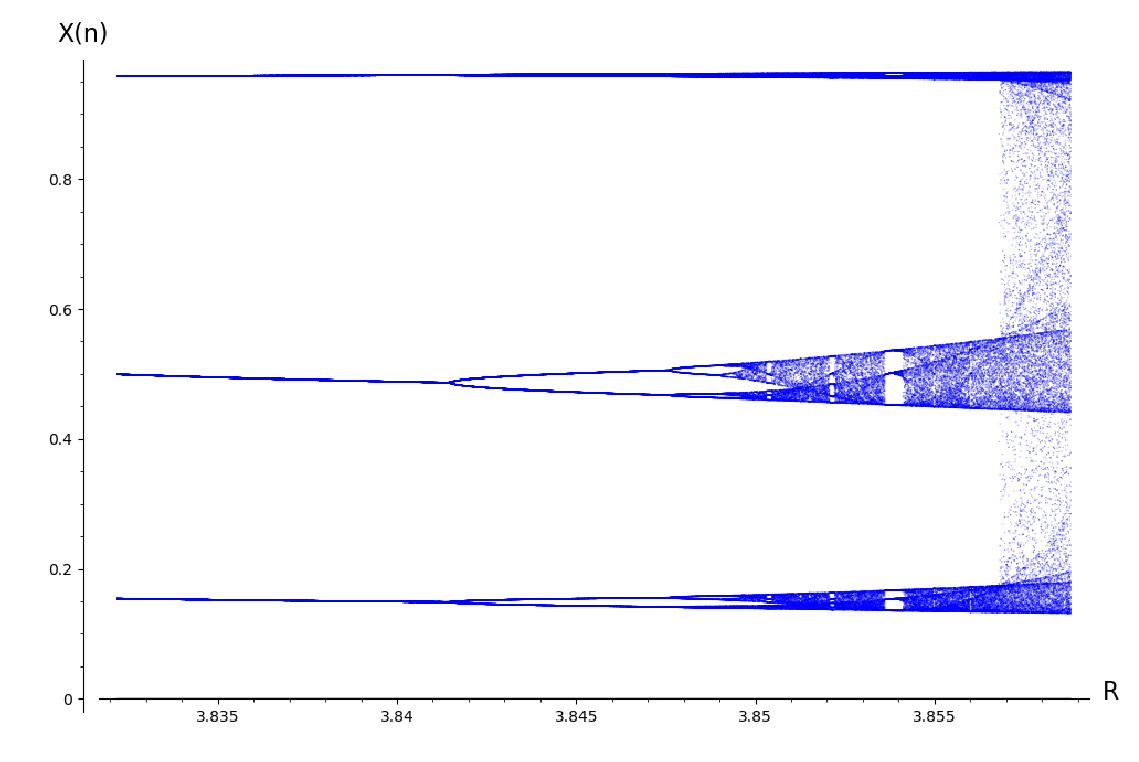

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('Ordnungsinsel 3,87.png')
plt.figure(figsize=(20,12), dpi=80)
plt.axis("off")
imgplot = plt.imshow(img)


Dieses Auftreten derselben grundlegenden Merkmale wird als Selbstähnlichkeit bezeichnet und ist eine typische Eigenschaft der Fraktale.

### Quellen:
$^1$: Pierre-François Verhulst: Notice sur la loi que la population suit dans son accroissement. In: Correspondance Mathématique et Physique. Band 10, 1838


$^2$: Robert May: Simple mathematical models with very complicated dynamics Nature V. 261, S. 460, 10 Juni 1976

$^3$: Keith Briggs: A precise calculation of the Feigenbaum constants. Mathematics of Computation 57, Juli 1991, S. 435–439

$^4$: Nagashima, H., Baba, Y., Introduction to Chaos, IOP Publishing Ltd., Bristol and Philadelphia, 1999

$^5$: http://www.bio-physics.at/wiki/index.php?title=Logistische_Gleichung

$^6$: Loistl, O., Chaostheorie - zur Theorie nicht linearer dynamischer Systeme, München, S. 31, 1996

$^7$: http://www.fraktalwelt.de/systeme/fa_chaos.pdf